#SGD optimizer as a baseline on CIFAR10 dataset

Learning Rate: 0.1, Momentum: 0.9
Training Loss: 2.136237144470215, Validation Loss: 2.172860860824585
Training Accuracy: 0.17730000615119934, Validation Accuracy: 0.1712999939918518




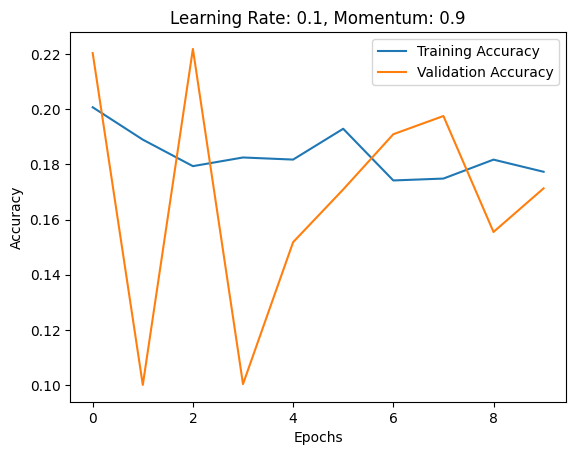

Learning Rate: 0.1, Momentum: 0.95
Training Loss: 2.3176844120025635, Validation Loss: 2.310983180999756
Training Accuracy: 0.0997999981045723, Validation Accuracy: 0.10000000149011612




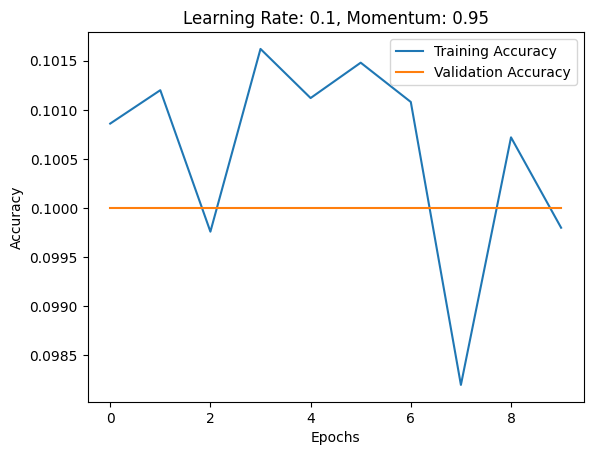

Learning Rate: 0.1, Momentum: 0.99
Training Loss: 2.382286787033081, Validation Loss: 2.322803497314453
Training Accuracy: 0.10040000081062317, Validation Accuracy: 0.10000000149011612




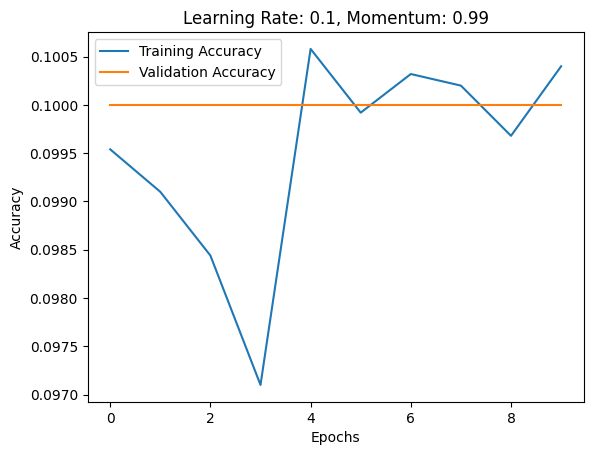

Learning Rate: 0.01, Momentum: 0.9
Training Loss: 0.47271931171417236, Validation Loss: 1.2738046646118164
Training Accuracy: 0.8337600231170654, Validation Accuracy: 0.6477000117301941




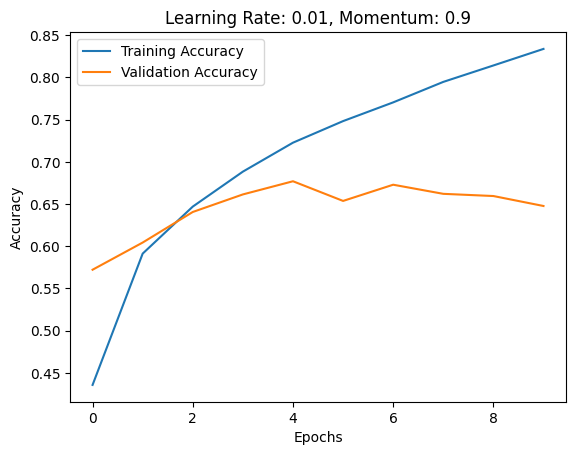

Learning Rate: 0.01, Momentum: 0.95
Training Loss: 0.7054201364517212, Validation Loss: 1.3201466798782349
Training Accuracy: 0.7564799785614014, Validation Accuracy: 0.6279000043869019




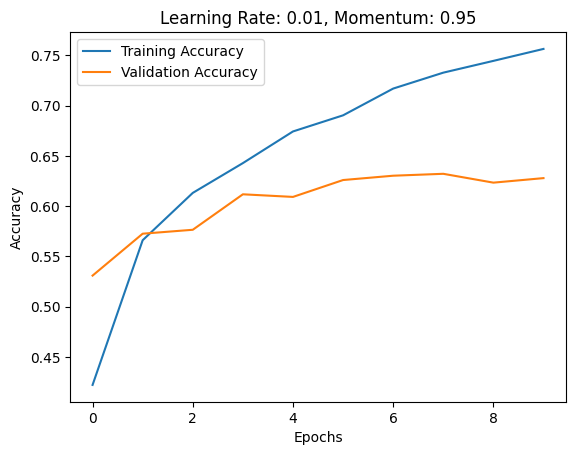

Learning Rate: 0.01, Momentum: 0.99
Training Loss: 2.307645082473755, Validation Loss: 2.3094422817230225
Training Accuracy: 0.10013999789953232, Validation Accuracy: 0.10010000318288803




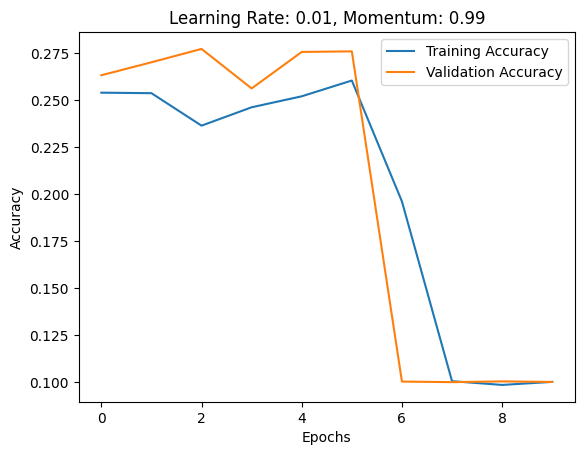

Learning Rate: 0.001, Momentum: 0.9
Training Loss: 0.9748177528381348, Validation Loss: 1.021004319190979
Training Accuracy: 0.6627200245857239, Validation Accuracy: 0.6407999992370605




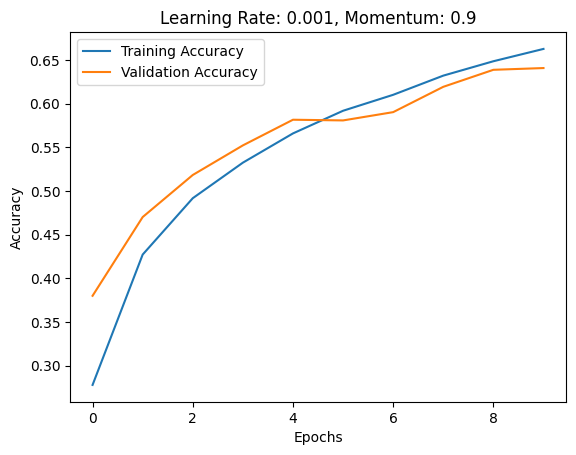

Learning Rate: 0.001, Momentum: 0.95
Training Loss: 0.8012425899505615, Validation Loss: 0.9898450970649719
Training Accuracy: 0.7215200066566467, Validation Accuracy: 0.6603999733924866




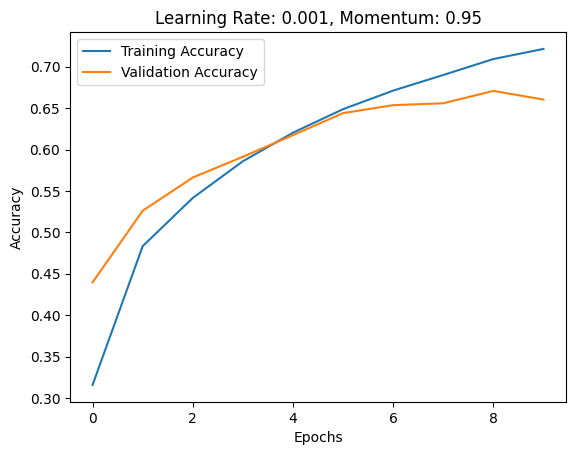

Learning Rate: 0.001, Momentum: 0.99
Training Loss: 0.5712698698043823, Validation Loss: 1.1502034664154053
Training Accuracy: 0.7978000044822693, Validation Accuracy: 0.6588000059127808




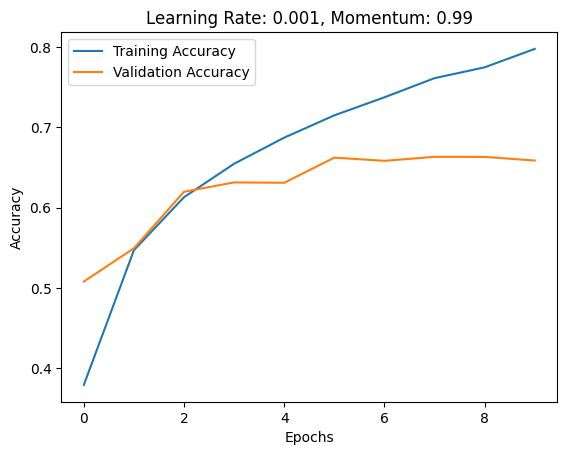

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load and preprocess CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define a function to create and compile the model with given parameters
def create_model(learning_rate, momentum):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define ranges for learning rate and momentum
learning_rate_range = [0.1, 0.01, 0.001]
momentum_range = [0.9, 0.95, 0.99]

# Grid Search: Iterate through different combinations
for lr in learning_rate_range:
    for mom in momentum_range:
        model = create_model(learning_rate=lr, momentum=mom)

        # Train the model
        history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), verbose=0)

        # Record metrics
        train_loss = history.history['loss'][-1]
        val_loss = history.history['val_loss'][-1]
        train_acc = history.history['accuracy'][-1]
        val_acc = history.history['val_accuracy'][-1]

        print(f"Learning Rate: {lr}, Momentum: {mom}")
        print(f"Training Loss: {train_loss}, Validation Loss: {val_loss}")
        print(f"Training Accuracy: {train_acc}, Validation Accuracy: {val_acc}")
        print("\n")

        # Plot results
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Learning Rate: {lr}, Momentum: {mom}')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()


The influence of tuning different sets of parameters lies in finding the right balance between the learning rate and momentum. A well-tuned set of parameters can lead to improved convergence, faster training, and better generalization to unseen data. It helps avoid issues like slow convergence, oscillations, or divergence in the training process. The plots of metrics over epochs can provide insights into the stability and performance of the model under different parameter configurations.

#Comparison of SGD optimizer to RMSProp, AdaGrad and Adam optimizer

Optimizer: SGD
Training Loss: 0.25698110461235046, Validation Loss: 1.9882984161376953
Training Accuracy: 0.911300003528595, Validation Accuracy: 0.64410001039505




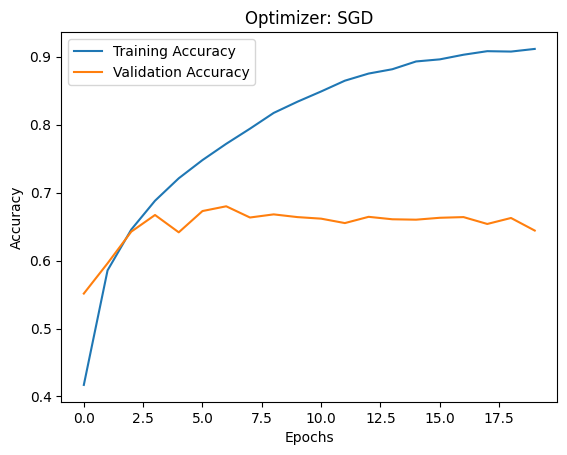

Optimizer: RMSprop
Training Loss: 0.2312747985124588, Validation Loss: 1.649294376373291
Training Accuracy: 0.9215199947357178, Validation Accuracy: 0.6765999794006348




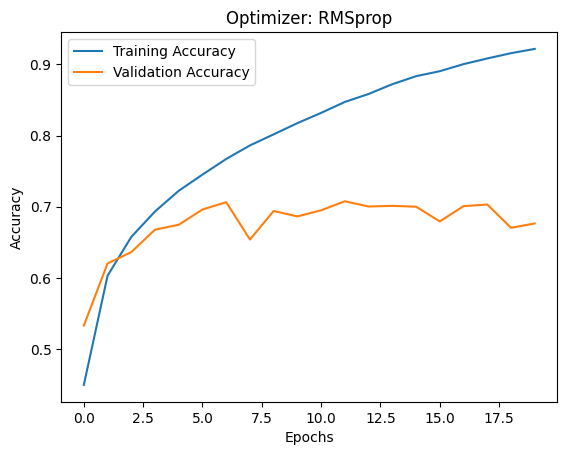

Optimizer: Adagrad
Training Loss: 0.7978807091712952, Validation Loss: 0.9499139785766602
Training Accuracy: 0.7289999723434448, Validation Accuracy: 0.6758000254631042




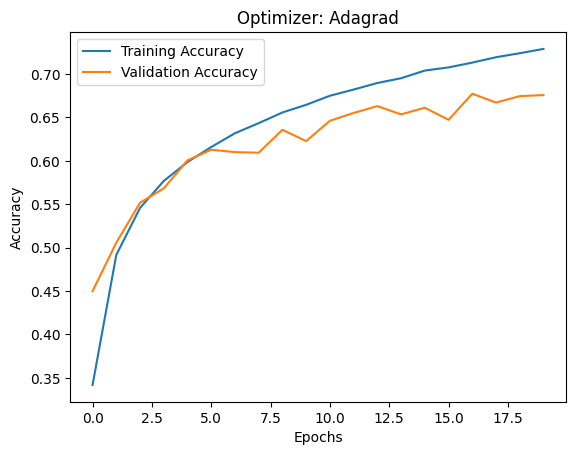

Optimizer: Adam
Training Loss: 0.40387293696403503, Validation Loss: 1.2001081705093384
Training Accuracy: 0.855139970779419, Validation Accuracy: 0.6830999851226807




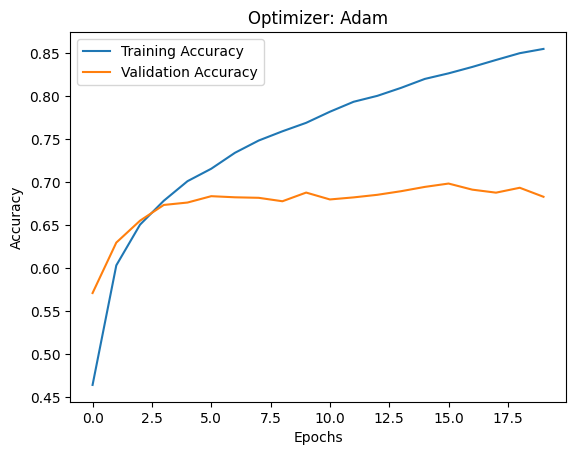

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define a function to create and compile the model with given parameters
def create_model(optimizer):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define optimizers
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
adagrad_optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

optimizers = {'SGD': sgd_optimizer, 'RMSprop': rmsprop_optimizer, 'Adagrad': adagrad_optimizer, 'Adam': adam_optimizer}

# Iterate through different optimizers
for optimizer_name, optimizer in optimizers.items():
    model = create_model(optimizer)

    # Train the model
    history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels), verbose=0)

    # Record metrics
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    print(f"Optimizer: {optimizer_name}")
    print(f"Training Loss: {train_loss}, Validation Loss: {val_loss}")
    print(f"Training Accuracy: {train_acc}, Validation Accuracy: {val_acc}")
    print("\n")

    # Plot results
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Optimizer: {optimizer_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


From the implementation above, where SGD optimizers is compared with Adagrad, RMSProp and Adam using CNN architecture over 20 epochs. It is observable that RMSProp is the better optimization alogorithm at the end of the training period with Training Loss: 0.2312747985124588, Validation Loss: 1.649294376373291
Training Accuracy: 0.9215199947357178 and  Validation Accuracy: 0.6765999794006348. It is also worthy to note that Adam is very close behind the RMSProp and with increasing epoch number it is sure to catch up with and even do better than the RMSProp.